In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress, ttest_ind

In [2]:
# EXPERIMENT_SNS = ['p5972', 'p5973', 'p5974', 'p5975', 'p5979', 'p5993']
# RUN_NUMBERS = [2, 2, 4, 2, 2, 1]

In [3]:
EXPERIMENT_SNS = ['p5972', 'p5973', 'p5974', 'p5979', 'p5993']
RUN_NUMBERS = [2, 2, 4, 2, 1]

In [4]:
RUPTURE_SPEEDS = []
XCS = []
GAMMAS = []

for ii in range(len(EXPERIMENT_SNS)):
    
    for event_number in range(9):
        
        experiment_SN = EXPERIMENT_SNS[ii]
        run_number = RUN_NUMBERS[ii]
        
        print(experiment_SN, event_number)
        
        filename = f'../Data/{experiment_SN}e.npz'
        
        data = np.load(filename, allow_pickle = True)
        data = data["experiment"][()]
        event = data['runs'][run_number]['events'][event_number]
        

        C_f = np.abs(event['rupture_speed'])
        Gamma = np.abs(event['gamma'])
        Xc = np.abs(event['X_c'])
        
        RUPTURE_SPEEDS.append(C_f)
        GAMMAS.append(Gamma)
        XCS.append(Xc)
        
        
        print(f'Cf: {C_f:.1f}m/s, Gamma: {Gamma:.1f}J/m2, Xc: {Xc:.1f}mm')
        
RUPTURE_SPEEDS = np.array(RUPTURE_SPEEDS)
GAMMAS = np.array(GAMMAS)
XCS = np.array(XCS)

p5972 0
Cf: 256.2m/s, Gamma: 200.0J/m2, Xc: 32185.9mm
p5972 1
Cf: 519.7m/s, Gamma: 200.0J/m2, Xc: 27659.9mm
p5972 2
Cf: 536.6m/s, Gamma: 172.2J/m2, Xc: 1003.3mm
p5972 3
Cf: 510.6m/s, Gamma: 200.0J/m2, Xc: 3124766.4mm
p5972 4
Cf: 603.2m/s, Gamma: 177.1J/m2, Xc: 1155.9mm
p5972 5
Cf: 628.6m/s, Gamma: 125.5J/m2, Xc: 716.8mm
p5972 6
Cf: 622.6m/s, Gamma: 200.0J/m2, Xc: 11878.4mm
p5972 7
Cf: 605.5m/s, Gamma: 313.9J/m2, Xc: 1427.9mm
p5972 8
Cf: 724.1m/s, Gamma: 257.6J/m2, Xc: 1149.2mm
p5973 0
Cf: 578.9m/s, Gamma: 200.0J/m2, Xc: 4313.1mm
p5973 1
Cf: 625.6m/s, Gamma: 193.1J/m2, Xc: 263.4mm
p5973 2
Cf: 673.5m/s, Gamma: 525.4J/m2, Xc: 358.0mm
p5973 3
Cf: 619.7m/s, Gamma: 110.7J/m2, Xc: 472.3mm
p5973 4
Cf: 643.9m/s, Gamma: 285.7J/m2, Xc: 255.1mm
p5973 5
Cf: 782.6m/s, Gamma: 398.3J/m2, Xc: 331.5mm
p5973 6
Cf: 676.9m/s, Gamma: 289.1J/m2, Xc: 632.5mm
p5973 7
Cf: 653.5m/s, Gamma: 215.1J/m2, Xc: 434.8mm
p5973 8
Cf: 828.5m/s, Gamma: 430.6J/m2, Xc: 421.9mm
p5974 0
Cf: 716.5m/s, Gamma: 695.5J/m2, Xc: 828.7

In [5]:
np.savez('../Output/Cf-Gamma-Xc.npz', RUPTURE_SPEEDS=RUPTURE_SPEEDS, GAMMAS=GAMMAS, XCS=XCS)

In [6]:
data = np.load('../Output/Cf-Gamma-Xc.npz')
RUPTURE_SPEEDS = data['RUPTURE_SPEEDS']
GAMMAS = data['GAMMAS']
XCS = data['XCS']

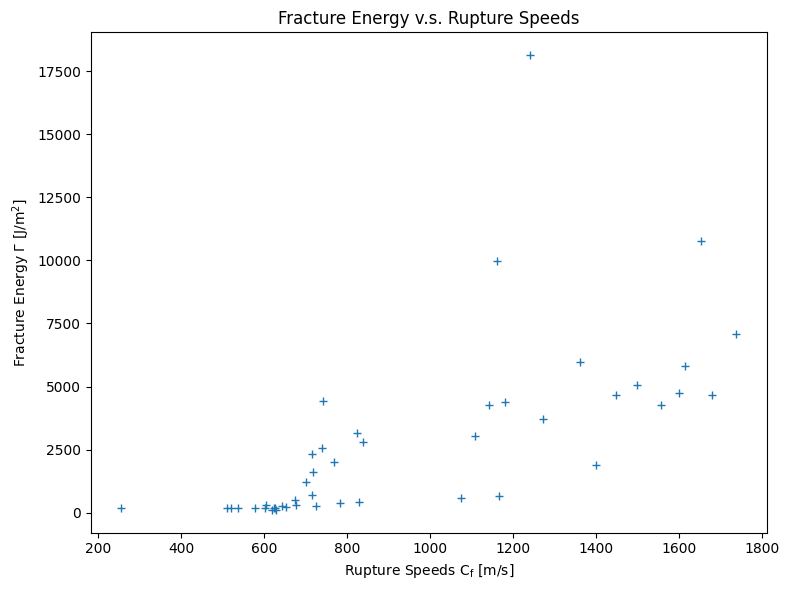

In [7]:
plt.rcParams.update({'mathtext.default': 'regular'})
plt.figure(figsize = (8, 6))

plt.title('Fracture Energy v.s. Rupture Speeds')
plt.plot(RUPTURE_SPEEDS, GAMMAS, '+')
plt.xlabel('Rupture Speeds $C_f$ [m/s]')
plt.ylabel('Fracture Energy $\Gamma$ [J/m$^2$]')
plt.tight_layout()
plt.savefig(f'../Plot/Cf-Gamma.pdf', dpi = 300)
plt.show()
plt.close()

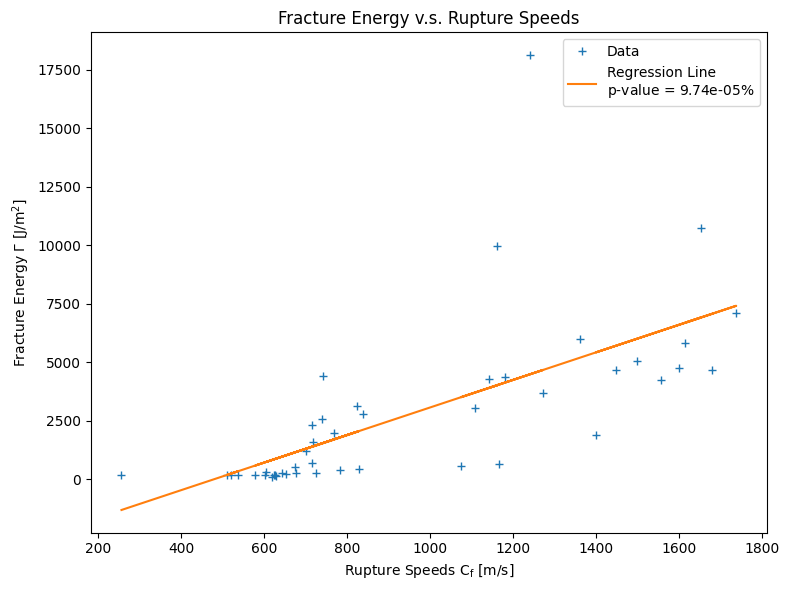

The p-value for testing the linear trend is 9.74e-07.
The t-test p-value for hypothesis testing is 9.75e-07.


In [8]:
# Perform linear regression to calculate the p-value
slope, intercept, r_value, p_value, std_err = linregress(RUPTURE_SPEEDS, GAMMAS)

# Perform hypothesis test (t-test) to check if the mean of GAMMAS significantly differs from zero
t_stat, p_value_ttest = ttest_ind(GAMMAS, np.zeros_like(GAMMAS), alternative = 'two-sided')

# Plotting the data
plt.rcParams.update({'mathtext.default': 'regular'})
plt.figure(figsize=(8, 6))

plt.title('Fracture Energy v.s. Rupture Speeds')
plt.plot(RUPTURE_SPEEDS, GAMMAS, '+', label='Data')

# Plot the regression line for visualization
regression_line = intercept + slope * RUPTURE_SPEEDS
plt.plot(RUPTURE_SPEEDS, regression_line, '-', label = f'Regression Line\n$p$-value = {p_value * 100:.2e}%')

# Add labels and legend
plt.xlabel('Rupture Speeds $C_f$ [m/s]')
plt.ylabel('Fracture Energy $\Gamma$ [J/m$^2$]')
plt.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f'../Plot/Cf-Gamma.pdf', dpi=300)
plt.show()
plt.close()

# Print the p-value results for further analysis
print(f"The p-value for testing the linear trend is {p_value:.2e}.")
print(f"The t-test p-value for hypothesis testing is {p_value_ttest:.2e}.")

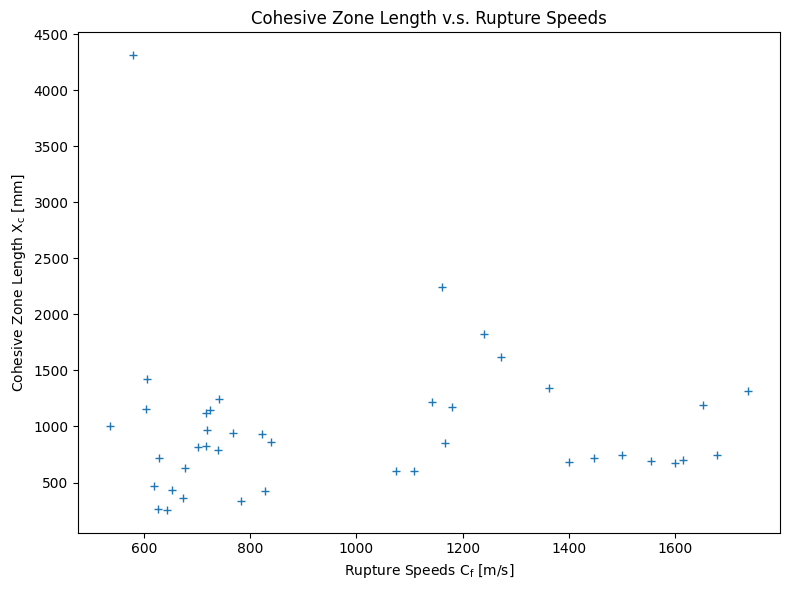

In [9]:
plt.rcParams.update({'mathtext.default': 'regular'})
plt.figure(figsize = (8, 6))

RUPTURE_SPEEDS = RUPTURE_SPEEDS[XCS<5000]
XCS = XCS[XCS<5000]

plt.title('Cohesive Zone Length v.s. Rupture Speeds')
plt.plot(RUPTURE_SPEEDS, XCS, '+')
plt.xlabel('Rupture Speeds $C_f$ [m/s]')
plt.ylabel('Cohesive Zone Length $X_c$ [mm]')
plt.tight_layout()
plt.savefig(f'../Plot/Cf-Xc.pdf', dpi = 300)
plt.show()
plt.close()

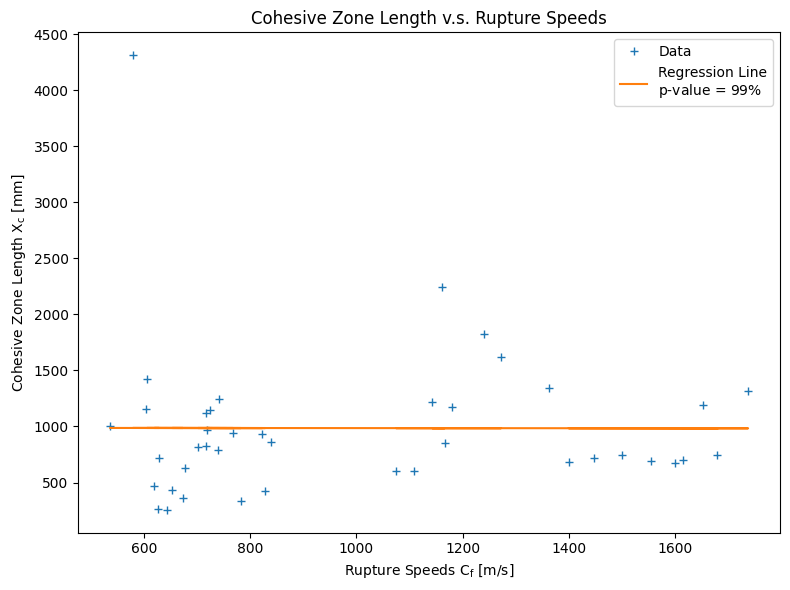

The p-value for testing the linear trend is 9.92e-01.
The t-test p-value for hypothesis testing is 2.26e-14.


In [10]:
# Filter data based on condition
RUPTURE_SPEEDS = RUPTURE_SPEEDS[XCS < 5000]
XCS = XCS[XCS < 5000]

# Perform linear regression to calculate the p-value
slope, intercept, r_value, p_value, std_err = linregress(RUPTURE_SPEEDS, XCS)

# Perform hypothesis test (t-test) to check if the mean of XCS significantly differs from zero
t_stat, p_value_ttest = ttest_ind(XCS, np.zeros_like(XCS), alternative='two-sided')

# Plotting the data
plt.rcParams.update({'mathtext.default': 'regular'})
plt.figure(figsize=(8, 6))

plt.title('Cohesive Zone Length v.s. Rupture Speeds')
plt.plot(RUPTURE_SPEEDS, XCS, '+', label='Data')

# Plot the regression line for visualization
regression_line = intercept + slope * RUPTURE_SPEEDS
plt.plot(RUPTURE_SPEEDS, regression_line, '-', label = f'Regression Line\n$p$-value = {p_value * 100:.0f}%')

# Add labels and legend
plt.xlabel('Rupture Speeds $C_f$ [m/s]')
plt.ylabel('Cohesive Zone Length $X_c$ [mm]')
plt.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f'../Plot/Cf-Xc.pdf', dpi=300)
plt.show()
plt.close()

# Print the p-value results for further analysis
print(f"The p-value for testing the linear trend is {p_value:.2e}.")
print(f"The t-test p-value for hypothesis testing is {p_value_ttest:.2e}.")